# Testing our custom dataset

## Mount drive/import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install contractions

import sys
sys.path.append('/content/drive/My Drive/sentiment-analysis/functions')
import sentiment_analysis_functions, text_functions, image_functions, multimodal_functions
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.4 MB/s eta 0:00:00


## Load final annotations

You have to select between the method to load the final annotations. You have to run only one of the following 3 blocks of code.

### Final annotations made by first annotator

In [ ]:
import numpy as np
import pandas as pd
xlsx_file = '/content/drive/MyDrive/sentiment-analysis/custom dataset/Custom dataset labelling.xlsx'
df = pd.read_excel(xlsx_file, header=1)

df = df.loc[0:259,['ID','TEXT.2','IMAGE.2','BOTH.2']]
print(df)

text_labels = df['TEXT.2'].to_numpy()
image_labels = df['IMAGE.2'].to_numpy()
multimodal_labels = df['BOTH.2'].to_numpy()

images = np.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/images.npy',allow_pickle=True)
texts = np.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/texts.npy')

      ID  TEXT.2  IMAGE.2  BOTH.2
0      1     2.0      1.0     2.0
1      2     0.0      0.0     0.0
2      3     0.0      0.0     0.0
3      4     0.0      0.0     0.0
4      5     1.0      1.0     1.0
..   ...     ...      ...     ...
255  256     2.0      2.0     2.0
256  257     1.0      1.0     1.0
257  258     2.0      2.0     2.0
258  259     2.0      1.0     2.0
259  260     2.0      2.0     2.0

[260 rows x 4 columns]


### Exclude conflicts from the dataset

In [ ]:
import numpy as np
import pandas as pd
xlsx_file = '/content/drive/MyDrive/sentiment-analysis/custom dataset/Custom dataset labelling.xlsx'
df = pd.read_excel(xlsx_file, header=1)

df = df.loc[0:259,['ID','TEXT.3','IMAGE.3','BOTH.3']]
df = df.dropna(how='any', axis=0)
print(df)

text_labels = df['TEXT.3'].to_numpy()
image_labels = df['IMAGE.3'].to_numpy()
multimodal_labels = df['BOTH.3'].to_numpy()
print(np.shape(multimodal_labels))

images = np.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/images.npy',allow_pickle=True)
texts = np.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/texts.npy')

rows_to_keep = df['ID'].values.tolist()
rows_to_keep = [row - 1 for row in rows_to_keep]
images = images[rows_to_keep]
texts = texts[rows_to_keep]

      ID  TEXT.3  IMAGE.3  BOTH.3
0      1     2.0      1.0     2.0
1      2     0.0      0.0     0.0
2      3     0.0      0.0     0.0
3      4     0.0      0.0     0.0
6      7     0.0      0.0     0.0
..   ...     ...      ...     ...
254  255     2.0      2.0     2.0
255  256     2.0      2.0     2.0
257  258     2.0      2.0     2.0
258  259     2.0      1.0     2.0
259  260     2.0      2.0     2.0

[179 rows x 4 columns]
(179,)


### Preprocessing conflicts with the same method as MVSA-Single

In [ ]:
import numpy as np
import pandas as pd

def create_labels(df,col1,col2):
  labels = []
  rows_to_exclude = []
  for ind in df.index:
    label, exclude = labeling(df[col1][ind],df[col2][ind])
    if exclude is True:
      rows_to_exclude.append(ind)
      labels.append(label)
    else:
      labels.append(label)
  return labels, rows_to_exclude

def labeling(label_0, label_1):
  if label_0 == label_1:
    return label_0,False
  elif (label_0 == 0 and label_1 == 2) or (label_0 == 2 and label_1 == 0):
    return -1,True
  elif label_0 == 1:
    return label_1, False
  elif label_1 == 1:
    return label_0, False

xlsx_file = '/content/drive/MyDrive/sentiment-analysis/custom dataset/Custom dataset labelling.xlsx'
df = pd.read_excel(xlsx_file, header=1)
df = df.loc[0:259,['ID','TEXT','IMAGE','BOTH','TEXT.1','IMAGE.1','BOTH.1']]
print(df)

text_labels = []
image_labels = []
multimodal_labels = []
rows_to_exclude = []

text_labels,text_rows_to_exclude = create_labels(df,'TEXT','TEXT.1')
image_labels,image_rows_to_exclude = create_labels(df,'IMAGE','IMAGE.1')
multimodal_labels,multimodal_rows_to_exclude = create_labels(df,'BOTH','BOTH.1')

print(text_rows_to_exclude)
print(image_rows_to_exclude)
print(multimodal_rows_to_exclude)


exclude_set = set(text_rows_to_exclude + image_rows_to_exclude + multimodal_rows_to_exclude)
rows_to_exclude = list(exclude_set)

images = np.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/images.npy',allow_pickle=True)
texts = np.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/texts.npy')

text_labels = [text_labels[i] for i in range(len(text_labels)) if i not in rows_to_exclude]
image_labels = [image_labels[i] for i in range(len(image_labels)) if i not in rows_to_exclude]
multimodal_labels = [multimodal_labels[i] for i in range(len(multimodal_labels)) if i not in rows_to_exclude]
images = [images[i] for i in range(len(images)) if i not in rows_to_exclude]
texts = [texts[i] for i in range(len(texts)) if i not in rows_to_exclude]

      ID  TEXT  IMAGE  BOTH  TEXT.1  IMAGE.1  BOTH.1
0      1   2.0    1.0   2.0     2.0      1.0     2.0
1      2   0.0    0.0   0.0     0.0      0.0     0.0
2      3   0.0    0.0   0.0     0.0      0.0     0.0
3      4   0.0    0.0   0.0     0.0      0.0     0.0
4      5   1.0    2.0   1.0     1.0      1.0     1.0
..   ...   ...    ...   ...     ...      ...     ...
255  256   2.0    2.0   2.0     2.0      2.0     2.0
256  257   1.0    1.0   1.0     2.0      2.0     2.0
257  258   2.0    2.0   2.0     2.0      2.0     2.0
258  259   2.0    1.0   2.0     2.0      1.0     2.0
259  260   2.0    2.0   2.0     2.0      2.0     2.0

[260 rows x 7 columns]
[172]
[56]
[57]


## Load the fine tuned models (text, image and fusion) of the MVSA-Single data

In [ ]:
from transformers import ViTModel, AutoModel
import torch
import torch.nn as nn
from transformers import  AutoTokenizer, ViTImageProcessor

class greekBertClassifier(nn.Module):
    def __init__(self):
        super(greekBertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels

        self.bert = AutoModel.from_pretrained("/content/drive/MyDrive/sentiment-analysis/custom dataset/models/greekTextModel")
        D_in, H, D_out = 768, 100, 3
        dropout = 0.5
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H), nn.ReLU(), nn.Dropout(dropout), nn.Linear(H, D_out)
        )
        self.classifier.load_state_dict(
            torch.load(
                "/content/drive/MyDrive/sentiment-analysis/custom dataset/models/greekTextClassifier.pt", map_location=torch.device("cpu")
            )
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state_cls = outputs[0][:, 0, :]
        logits = self.classifier(last_hidden_state_cls)
        return logits


class VisualTransformer(nn.Module):
    def __init__(self):
        super(VisualTransformer, self).__init__()
        D_in, H, D_out = 768, 100, 3
        dropout = 0.2

        self.vit = ViTModel.from_pretrained("/content/drive/MyDrive/sentiment-analysis/custom dataset/models/imageModelv2")
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H), nn.ReLU(), nn.Dropout(dropout), nn.Linear(H, D_out)
        )

        self.classifier.load_state_dict(
            torch.load("/content/drive/MyDrive/sentiment-analysis/custom dataset/models/imageClassifier.pt", map_location=torch.device("cpu"))
        )

    def forward(self, images):
        outputs = self.vit(images)
        last_hidden_state_cls = outputs[0][:, 0, :]
        logits = self.classifier(last_hidden_state_cls)
        return logits


class FourLayersFC(nn.Module):
    def __init__(self, input_size, hidden_size, last_hidden_size, output_size):
        super(FourLayersFC, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, last_hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(last_hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out


def load_models():
    greekBert = greekBertClassifier()
    greekBert.eval()
    imageVit = VisualTransformer()
    imageVit.eval()
    multimodalModel = FourLayersFC(input_size=1536,hidden_size=400,last_hidden_size=300,output_size=3)
    multimodalModel.load_state_dict(torch.load('/content/drive/MyDrive/sentiment-analysis/custom dataset/models/multimodalModelv2.pt',
                                     map_location=torch.device('cpu')))
    multimodalModel.eval()
    greekTokenizer = AutoTokenizer.from_pretrained('nlpaueb/bert-base-greek-uncased-v1')
    imageProcessor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')

    return greekBert,imageVit,multimodalModel, greekTokenizer, imageProcessor

In [ ]:
batch_size = 32
text_labels = torch.tensor(text_labels)
image_labels = torch.tensor(image_labels)
multimodal_labels = torch.tensor(multimodal_labels)

greekBert,imageVit,multimodalModel,greekTokenizer,imageProcessor = load_models()
greekBert.to(device)
imageVit.to(device)
multimodalModel.to(device)

FourLayersFC(
  (fc1): Linear(in_features=1536, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=400, out_features=300, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=300, out_features=3, bias=True)
)

## Predict using the loaded models

### Text

0.7093094257947921
0.7120622568093385


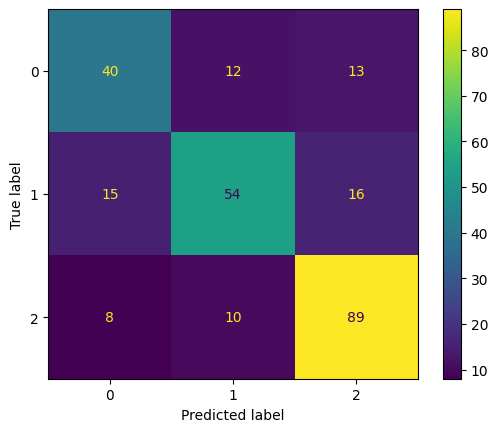

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

texts = [text_functions.text_preprocessing(text) for text in texts]
text_dataloader = sentiment_analysis_functions.create_dataloaders(texts,text_labels,batch_size,torch.Generator(),SHUFFLE=False,type='text',tokenizer=greekTokenizer)
probs_test, test_dataloader_labels = sentiment_analysis_functions.predict(greekBert, text_dataloader, device,'text')

probs_test = np.argmax(probs_test,1)  # Get the class with the highest probability
f1_test = f1_score(y_pred = probs_test, y_true = text_labels, average = 'weighted')
acc_test = accuracy_score(y_pred=probs_test,y_true= text_labels)
print(f1_test)
print(acc_test)

cm = confusion_matrix(text_labels,probs_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Image

-----------Test set-----------
0.43404510997618284
0.4785992217898833


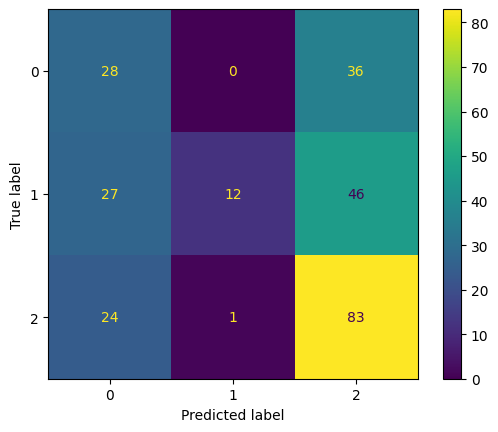

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import (CenterCrop,
                                    Compose,
                                    Normalize,
                                    RandomHorizontalFlip,
                                    RandomResizedCrop,
                                    Resize,
                                    ToTensor,
                                    ToPILImage,
                                    Lambda, RandomRotation,ColorJitter,RandomAffine
                                    )
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None, imageProcessor=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        self.imageProcessor = imageProcessor

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        image = image
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
            if self.imageProcessor is not None:
              image = self.imageProcessor(image, return_tensors='pt')['pixel_values'][0]

        return image, label

image_mean = imageProcessor.image_mean
image_std = imageProcessor.image_std

images = [Image.fromarray(np.uint8(image)).convert('RGB') for image in images]


test_transform = Compose(
    [
    ToTensor(),
    Normalize(mean=image_mean,std=image_std),
    ToPILImage()
    ]
)

image_dataset = CustomDataset(images,image_labels,test_transform, imageProcessor)
image_dataloader = DataLoader(
    image_dataset,
    shuffle=False,
    batch_size=batch_size,
    generator=torch.Generator()
)


probs_test, test_labels = sentiment_analysis_functions.predict(imageVit, image_dataloader,device,'image')

print('-----------Test set-----------')
probs_test = np.argmax(probs_test,1)  # Get the class with the highest probability
f1_test = f1_score(y_pred = probs_test, y_true = image_labels, average = 'weighted')
acc_test = accuracy_score(y_pred=probs_test,y_true= image_labels)
print(f1_test)
print(acc_test)

cm = confusion_matrix(image_labels,probs_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Multimodal

In [ ]:
text_logits = sentiment_analysis_functions.calculate_logits(greekBert.bert, text_dataloader, device, 'text')
image_logits = sentiment_analysis_functions.calculate_logits(imageVit.vit, image_dataloader, device, 'image')

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
multimodal = np.concatenate((text_logits,image_logits),1)
multimodal = torch.stack([torch.tensor(data,dtype=torch.float32) for data in multimodal])

multimodal_dataloader = sentiment_analysis_functions.create_dataloaders(multimodal,multimodal_labels,batch_size,torch.Generator(),False,'image')
probs_test, test_dataloader_labels = sentiment_analysis_functions.predict(multimodalModel, multimodal_dataloader,device,'image')

print('-----------Test set-----------')
probs_test = np.argmax(probs_test,1)
f1_test = f1_score(y_pred = probs_test, y_true = test_dataloader_labels, average = 'weighted')
acc_test = accuracy_score(y_pred=probs_test,y_true= test_dataloader_labels)
print(f1_test)
print(acc_test)

-----------Test set-----------
0.4057760947338313
0.4785992217898833
